# Face_Detection_Recognition

## Step 1: Dataset Selection
We will use the LFW (Labeled Faces in the Wild) dataset, which is simple and commonly used for face recognition tasks. We can download it using scikit-learn's built-in function

In [1]:
from sklearn.datasets import fetch_lfw_people 

# downloading the dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=70, download_if_missing=True)

### Very Detailed Explanation of above cell

We are importing the fetch_lfw_people function from the sklearn.datasets module

We are calling the fetch_lfw_people function to download the dataset if it is not already present and to load it. We are setting min_faces_per_person=70 to ensure that each person in the dataset has at least 70 images

## Step 2: Face Detection
We'll use OpenCV's pre-trained Haar Cascade model for face detection. Here's the code to detect faces in the images

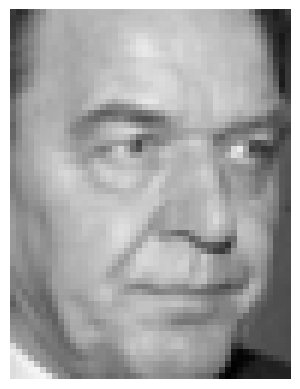

In [2]:
# Importing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

# Loading the dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=70)

# Loading Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_faces(image):
    # Checking if the image is already in grayscale
    if len(image.shape) == 3 and image.shape[2] == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    # Ensuring the image is in the right format
    if gray.dtype != np.uint8:
        gray = np.uint8(gray)

    # Detecting faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    return faces

# Example usage
image = lfw_dataset.images[0]
faces = detect_faces(image)

# Converting the image to BGR format for display
if len(image.shape) == 2:  # Grayscale image
    image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
else:
    image_bgr = image

# Displaying the image with detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image_bgr, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


### Very Detailed Explanation of above cell

We are importing the required libraries. cv2 is OpenCV for image processing, numpy is for handling arrays, and matplotlib.pyplot is for plotting images.

We are loading the pre-trained Haar Cascade model for face detection from OpenCV.

We are defining a function detect_faces to detect faces in the input image.

We are checking if the image is a color image (3 channels). If it is, we are converting it to grayscale using cv2.cvtColor.

If the image is already grayscale, we are using it directly.

We are ensuring that the image is in 8-bit format, which is required for detection.

We are detecting faces in the grayscale image. scaleFactor and minNeighbors are parameters to adjust the detection accuracy.

We are selecting the first image from the dataset for demonstration.

We are calling the detect_faces function to find faces in the selected image.

We are checking if the image is grayscale to convert it to BGR format for displaying with OpenCV.

We are iterating over detected faces and drawing rectangles around them on the image.

We are converting the BGR image to RGB format for correct color display in Matplotlib.

We are hiding the axes in the plot.

We are displaying the image with detected faces.

## Step 3: Face Recognition
We'll use a simple machine learning model, like PCA (Principal Component Analysis) followed by a linear classifier, for face recognition

In [3]:
# Importing necessary libraries
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Preparing the data for recognition
X = lfw_dataset.data
y = lfw_dataset.target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Creating a PCA model followed by a Support Vector Classifier (SVC)
pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='linear', class_weight='balanced')
model = make_pipeline(pca, svc)

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Displaying the classification report
print(classification_report(y_test, y_pred, target_names=lfw_dataset.target_names))


                   precision    recall  f1-score   support

    George W Bush       0.96      0.98      0.97        88
Gerhard Schroeder       0.93      0.87      0.90        31

         accuracy                           0.95       119
        macro avg       0.94      0.92      0.93       119
     weighted avg       0.95      0.95      0.95       119



### Very Detailed Explanation of above cell

We are importing PCA from scikit-learn for dimensionality reduction.

We are importing SVC from scikit-learn for classification.

We are importing make_pipeline to create a pipeline combining PCA and SVC.

We are importing train_test_split to split the dataset into training and testing sets.

We are importing classification_report to evaluate the model's performance.

We are preparing the features (images) for the model.

We are preparing the target labels (names) for the model.

We are splitting the dataset into training (75%) and testing (25%) sets.

We are creating a PCA model with 150 components and whitening to normalize the data.

We are creating an SVC model with a linear kernel and balanced class weights.

We are creating a pipeline that first applies PCA and then applies SVC.

We are training the model on the training data.

We are predicting the labels for the test data.

We are printing a classification report showing precision, recall, and F1-score for each class.